In [1]:
## Подключаем необходимые библиотеки
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')
import pandas as pd
import yfinance as yf
import matplotlib
from pandas_datareader import data as pdr
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from pandas_datareader import data as web
import datetime
from nsepy import get_history
from nsepython import *
import logging
urllib3_logger = logging.getLogger('urllib3') # Обработчик сообщений, чтобы они не выводились при сборе данных о тикерах
urllib3_logger.setLevel(logging.CRITICAL)

In [ ]:
# Задаем список тикеров. Здесь вручную.
list_of_tickers = ["GAZP.ME", "SBER.ME", "LKOH.ME", "GMKN.ME", "YNDX.ME", "NVTK.ME", "ROSN.ME", "POLY.ME", "TCSG.ME", "PLZL.ME", "MGNT.ME", "NLMK.ME", "TATN.ME", "CHMF.ME", "SNGSP.ME", "MTSS.ME", "ALRS.ME", "SNGSP.ME", "FIVE.ME", "IMOEX.ME", "SBERP.ME", "IRAO.ME", "VTBR.ME", "PHOR.ME", "RUAL.ME", "PIKK.ME", "MAGN.ME", "AFKS.ME", "RTKM.ME", "TRNFP.ME", "DSKY.ME", "AFLT.ME", "HYDR.ME", "TATNP.ME", "FEES.ME", "CBOM.ME", "LSRG.ME", "RSTI.ME", "SIBN.ME"]
# ЮАР ["ABG.JO", "AGL.JO", "AMS.JO", "ANG.JO", "APN.JO", "ARI.JO", "AVI.JO", "BID.JO", "BTI.JO", "BVT.JO", "CLS.JO", "CPI.JO", "DRD.JO", "DSY.JO", "EXX.JO", "FFB.JO", "FSR.JO", "GLN.JO", "GML.JO", "GRT.JO", "IMP.JO", "INL.JO", "IPL.JO", "KIO.JO", "LHC.JO", "MCG.JO", "MDI.JO", "MRP.JO", "MTN.JO", "NED.JO", "NHM.JO", "NPN.JO", "NRP.JO", "NTC.JO", "NY1.JO", "OAO.JO", "OMU.JO", "PPH.JO", "PSG.JO", "RDF.JO", "REM.JO", "RES.JO", "RMH.JO", "RMI.JO", "SAP.JO", "SBK.JO", "SHP.JO", "SLM.JO", "SOL.JO", "SSW.JO", "TBS.JO", "TFG.JO", "VOD.JO", "WHL.JO"]
# Польша ["P9O.F", "KGHA.F", "7PZ.F", "PKY1.F", "AL0.F", "1RY.F", "5Y2.F", "7CD.F", "BZI.F", "6PG.F", "CP9.F", "83I.F", "G17.F", "BRU.F", "TPA1.F", "6RK.F", "1T5.F", "SFB1.F", "FBF.F", "1HN.F", "1QT.F", "58S.F", "J2S.SG", "7HD.F", "6HW.SG", "697.F", "1HQ.F", "CHX.F", "WSX.F", "E07.F", "886.F", "MM2.F", "6P5.F", "A6O.F", "9PR.F", "8RP.F"]
# Россия ["GAZP.ME", "SBER.ME", "LKOH.ME", "GMKN.ME", "YNDX.ME", "NVTK.ME", "ROSN.ME", "POLY.ME", "TCSG.ME", "PLZL.ME", "MGNT.ME", "NLMK.ME", "TATN.ME", "CHMF.ME", "SNGSP.ME", "MTSS.ME", "ALRS.ME", "SNGSP.ME", "FIVE.ME", "IMOEX.ME", "SBERP.ME", "IRAO.ME", "VTBR.ME", "PHOR.ME", "RUAL.ME", "PIKK.ME", "MAGN.ME", "AFKS.ME", "RTKM.ME", "TRNFP.ME", "DSKY.ME", "AFLT.ME", "HYDR.ME", "TATNP.ME", "FEES.ME", "CBOM.ME", "LSRG.ME", "RSTI.ME", "SIBN.ME"]
# Турция ["AGHOL.IS", "TURSG.IS", "AKBNK.IS", "AKCNS.IS", "AKSGY.IS", "AKSA.IS", "AKSEN.IS", "ALGYO.IS", "ALARK.IS", "ALBRK.IS", "ALCTL.IS", "ALKIM.IS", "AEFES.IS", "ARCLK.IS", "ARDYZ.IS", "ASELS.IS", "AYGAZ.IS", "BAGFS.IS", "BIMAS.IS", "BIZIM.IS", "BRSAN.IS", "BRISA.IS", "BUCIM.IS", "CLEBI.IS", "CEMTS.IS", "CIMSA.IS", "CCOLA.IS", "DEVA.IS", "DOHOL.IS", "DOAS.IS", "EGEEN.IS", "EKGYO.IS", "ENJSA.IS", "ENKAI.IS", "EREGL.IS", "FROTO.IS", "GARAN.IS", "GOODY.IS", "GOZDE.IS", "GSDHO.IS", "GUBRF.IS", "HALKB.IS", "HEKTS.IS", "INDES.IS", "IPEKE.IS", "ISFIN.IS", "ISGYO.IS", "ISMEN.IS", "ISDMR.IS", "KRDMD.IS", "KAREL.IS", "KARTN.IS", "KERVT.IS", "KCHOL.IS", "KORDS.IS", "KOZAL.IS", "KOZAA.IS", "LOGO.IS", "MAVI.IS", "MGROS.IS", "MPARK.IS", "NTHOL.IS", "NETAS.IS", "ODAS.IS", "OTKAR.IS", "OYAKC.IS", "OZKGY.IS", "PGSUS.IS", "PETKM.IS", "PETUN.IS", "PNSUT.IS", "SAHOL.IS", "SASA.IS", "SKBNK.IS", "SELEC.IS", "SISE.IS", "SOKM.IS", "TATGD.IS", "TAVHL.IS", "TKFEN.IS", "THYAO.IS", "TOASO.IS", "TRGYO.IS", "TSKB.IS", "TMSN.IS", "TUPRS.IS", "TTKOM.IS", "TTRAK.IS", "TKC", "THBIY", "ISCTR.IS", "TURSG.IS", "ULKER.IS", "VAKBN.IS", "VESTL.IS", "YKBNK.IS", "YATAS.IS", "ZOREN.IS"]
# Задаем диапазон дат в котором нужно собирать все данные по тикерам
start = datetime.datetime(2017,1,1)
end = datetime.datetime.today().date() # сегодняшняя дата, чтобы не менять вручную.
# Получаем данные из Yahoo. Именно этот способ позволяет получить данные с тикерами в столбцах.
#f = pdr.DataReader(list_of_tickers, 'yahoo', start, end)
f = yf.download(list_of_tickers, start="2019-06-05", end="2021-06-05")

Exception in thread Exception in thread Thread-6Thread-5:
Traceback (most recent call last):
Exception in thread Exception in thread   File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Thread-7:
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Thread-4:
:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
        self.run()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self.run()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
self.run()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self.run()
  Fil

return _default_decoder.decode(s)
    return complexjson.loads(self.text, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/__init__.py", line 357, in loads
      File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
return complexjson.loads(self.text, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/__init__.py", line 357, in loads
    return _default_decoder.decode(s)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
    return _default_decoder.decode(s)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
        obj, end = se

Exception in thread Thread-16Exception in thread Exception in thread Thread-17Thread-18:
:
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
Exception in thread     Thread-19:
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
self.run()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self.run()    
self.run()      File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run

  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
self.run()
 

        data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 179, in _download_one
    data = data.json()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/requests/models.py", line 898, in json
    return callee(*args, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 167, in _download_one_threaded
return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 157, in history
    data = data.json()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/requests/models.py", line 898, in json
        return complexjson.loads(self.text, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/__init__.py", line 357, in loads
data = _download_one(ticker, start, end, auto_adjust, b

obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
    return complexjson.loads(self.text, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/__init__.py", line 357, in loads
        raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
return _default_decoder.decode(s)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
    return _default_decoder.decode(s)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
        raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
o

        return _default_decoder.decode(s)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 337, in decode
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 157, in history
return complexjson.loads(self.text, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/__init__.py", line 357, in loads
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", line 355, in raw_decode
    data = data.json()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/requests/models.py", line 898, in json
        raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)
return _default_decoder.decode(s)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/json/decoder.py", lin

Exception in thread Thread-40:
Traceback (most recent call last):
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 167, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 179, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 157, in history
    data = data.json()
  Fi

In [317]:
# Расчитываем прирост данных в таблице по строкам
data_pc = f.pct_change()

In [327]:
f

Adj Close                                                \
              AFKS.ME    AFLT.ME     ALRS.ME   CBOM.ME      CHMF.ME   
Date                                                                  
2019-06-04   9.028333  94.320351   72.087555  5.864982   816.670898   
2019-06-05   8.960496  94.163712   71.870766  5.864000   811.663513   
2019-06-06   9.093222  94.007057   71.445213  5.960000   820.113464   
2019-06-07   9.074541  93.850418   71.300690  5.980000   821.521790   
2019-06-10   9.079457  93.400063   71.605789  5.973000   829.345825   
...               ...        ...         ...       ...          ...   
2021-05-31  31.600000  70.040001  108.762550  6.629000  1684.000000   
2021-06-01  32.181000  71.000000  110.378662  6.711000  1684.400024   
2021-06-02  31.823999  71.000000  112.189827  6.685000  1678.599976   
2021-06-03  32.254002  71.440002  111.130997  6.650000  1662.000000   
2021-06-04  31.937000  71.279999  111.846169  6.660000  1646.599976   

                                                                         ...  \
               DSKY.ME   FEES.ME      FIVE.ME     GAZP.ME       GMKN.ME  ...   
Date                                                                     ...   
2019-06-04   71.442078  0.150159  2001.530762  197.292023  10959.086914  ...   
2019-06-05   71.425369  0.147776  2025.988403  197.240585  10917.776367  ...   
2019-06-06   71.525642  0.149840  2026.986694  198.552094  10952.730469  ...   
2019-06-07   71.425369  0.152977  2036.969360  197.583466  10963.851562  ...   
2019-06-10   71.241547  0.154756  2045.454712  198.954971  11003.569336  ...   
...                ...       ...          ...         ...           ...  ...   
2021-05-31  146.195312  0.218960  2226.000000  260.619995  26358.000000  ...   
2021-06-01  146.828766  0.219020  2208.000000  263.920013  26696.000000  ...   
2021-06-02  149.055496  0.220060  2209.000000  270.940002  26912.000000  ...   
2021-06-03  149.612167  0.222280  2248.000000  272.260010  26586.000000  ...   
2021-06-04  148.633179  0.221180  2252.000000  273.769989  26392.000000  ...   

              Volume                                                           \
             SBER.ME  SBERP.ME  SIBN.ME  SNGSP.ME  TATN.ME TATNP.ME   TCSG.ME   
Date                                                                            
2019-06-04  70070790   8405830   672090  15277700  2215320   754330       NaN   
2019-06-05  49742690   7111480  1082330  10277800  1025100   331720       NaN   
2019-06-06  57127870   8675170   585230  11262400  1085883   214620       NaN   
2019-06-07  68423470  11310620   627920  13321500  1435370   681300       NaN   
2019-06-10  62696710  11487990   568620  11814800   973270   302120       NaN   
...              ...       ...      ...       ...      ...      ...       ...   
2021-05-31  22034940   3533740   551270  23618600  5174844  1265371  157141.0   
2021-06-01  35801140   4149980  1470910  36752500  7154805  1151043  313768.0   
2021-06-02  24476570   3481465  2295411  43434600  7117502  1562643  687718.0   
2021-06-03  32737141   4416060  1612495  34582400  6951158  1649703  368098.0   
2021-06-04  34898290   3301910  2333730  31280800  4378187   647754  562246.0   

                                          
           TRNFP.ME      VTBR.ME YNDX.ME  
Date                                      
2019-06-04     1379  19711250000  253184  
2019-06-05      524  70397430000  150053  
2019-06-06      527  32928870260  123852  
2019-06-07     3599  16464710000  196867  
2019-06-10     1164  22309060000  136487  
...             ...          ...     ...  
2021-05-31      691  36518350000  220606  
2021-06-01     1202  96516910000  540528  
2021-06-02     2459  53050200000  604712  
2021-06-03     1076  55933230000  392780  
2021-06-04     3150  74915690000  481793  

[504 rows x 228 columns]

In [318]:
data_pc = pd.DataFrame(data_pc["Adj Close"])
data_pc

,AFKS.ME,AFLT.ME,ALRS.ME,CBOM.ME,CHMF.ME,DSKY.ME,FEES.ME,FIVE.ME,GAZP.ME,GMKN.ME,...,SBER.ME,SBERP.ME,SIBN.ME,SNGSP.ME,TATN.ME,TATNP.ME,TCSG.ME,TRNFP.ME,VTBR.ME,YNDX.ME
Date,,,,,,,,,,,,,,,,,,,,,
2019-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05,-0.007514,-0.001661,-0.003007,-0.000167,-0.006131,-0.000234,-0.015866,0.012219,-0.000261,-0.003770,...,0.011144,0.013957,0.005858,-0.001476,-0.022167,-0.017079,NaN,-0.007528,0.037655,0.006151
2019-06-06,0.014812,-0.001664,-0.005921,0.016371,0.010411,0.001404,0.013965,0.000493,0.006649,0.003202,...,0.026443,0.019422,-0.000406,0.000370,0.010668,-0.002699,NaN,0.006005,0.007258,0.013161
2019-06-07,-0.002054,-0.001666,-0.002023,0.003356,0.001717,-0.001402,0.020938,0.004925,-0.004878,0.001015,...,0.013636,0.015491,0.001220,-0.000369,-0.005674,0.006766,NaN,0.015708,0.003603,0.013493
2019-06-10,0.000542,-0.004799,0.004279,-0.001171,0.009524,-0.002574,0.011625,0.004166,0.006941,0.003623,...,0.002900,0.002277,-0.003654,0.006282,0.007696,0.008737,NaN,-0.008970,0.011538,0.006781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,-0.006289,-0.000856,0.025933,-0.007486,0.005757,-0.000525,0.004772,0.012739,-0.006405,0.005770,...,0.001194,0.007364,0.011344,0.005390,0.014016,0.014307,0.003823,0.008127,0.008071,-0.006720
2021-06-01,0.018386,0.013706,0.014859,0.012370,0.000238,0.004333,0.000274,-0.008086,0.012662,0.012823,...,0.002642,0.003416,0.025303,0.002788,0.019231,0.019789,-0.009213,0.004206,0.010675,-0.002674
2021-06-02,-0.011094,0.000000,0.016409,-0.003874,-0.003443,0.015165,0.004748,0.000453,0.026599,0.008091,...,0.007166,0.003813,0.017428,0.001711,0.014151,0.018167,-0.028042,0.021640,0.010766,0.010968


In [321]:
# Расчитываем стандарное отклонение по каждому тикеру за год. Так определяем волатильность актива.
data_std = data_pc.loc['2019-07-01':'2020-5-30'].std()*(252**0.5)*100 
data_std.head(25)

AFKS.ME     38.240037
AFLT.ME     43.982876
ALRS.ME     34.835998
CBOM.ME     19.398421
CHMF.ME     23.799602
DSKY.ME     36.931965
FEES.ME     36.704266
FIVE.ME     36.667298
GAZP.ME     29.210417
GMKN.ME     34.475774
HYDR.ME     37.098552
IMOEX.ME    25.344673
IRAO.ME     37.538948
LKOH.ME     43.975772
LSRG.ME     35.117060
MAGN.ME     29.263659
MGNT.ME     35.573200
MTSS.ME     23.347101
NLMK.ME     29.348595
NVTK.ME     39.470922
PHOR.ME     17.946334
PIKK.ME     24.881118
PLZL.ME     35.114392
POLY.ME     38.539009
ROSN.ME     41.778585
dtype: float64

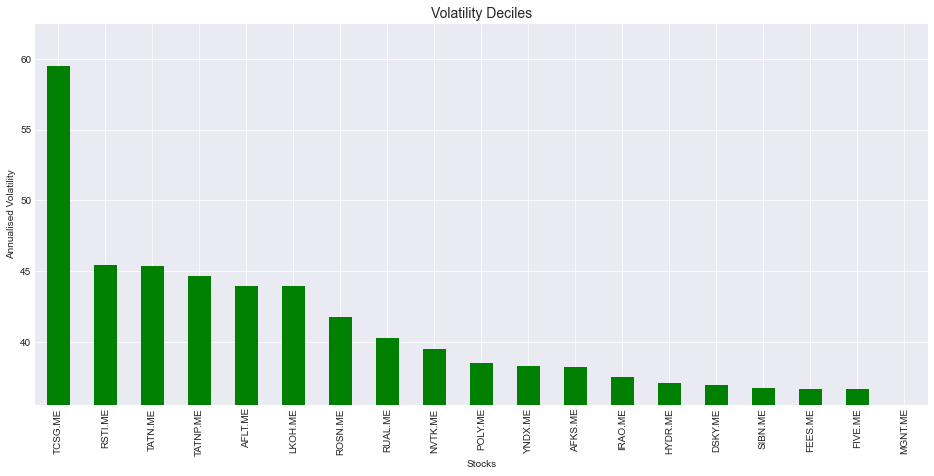

In [322]:
# Сортируем все тикеры по волатильности (стд отклонению).
vol_sorted = data_std.sort_values(ascending=False)
# Выбираем нужно количество процентов от всех тикеров для портфелы. Сюда попадают самые волатильные компании.
top_decile = vol_sorted[:int(len(data_std)*0.5)] # Меняем процент компаний Тут
top_decile.plot.bar(figsize=(16,7),color='green',ylim=top_decile.min())
plt.title('Volatility Deciles', fontsize=14)
plt.xlabel('Stocks')
plt.ylabel('Annualised Volatility')
plt.show()

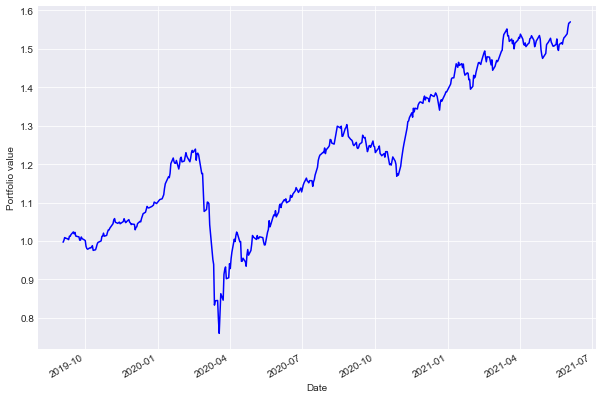

In [325]:
# снова возвращаемся к первоначальной таблице с полученными данными. Берем цену закрытия и преобразуем в ДФ
data = pd.DataFrame(f["Adj Close"])
# Выбираем из первоначальной таблицы нужный период жля бэктестинга
stock_data = data.loc['2019-9-1':'2021-6',top_decile.index]
#stock_data = stock_data.drop('TFG.JO', 1)
#stock_data.loc['2015-11-30', '7PZ.F'] = 8.846299743652344
# Расчитываем процентное изменение цены закрытия
stock_data_pc = stock_data.pct_change()
# создаем массив Портфолио в нем в дальнейшем и будут расчитываться доходности и сигналы
portfolio = pd.DataFrame()
# Расчитываем среднюю доходность портфеля. Всех акций сразу.
portfolio['returns'] = stock_data_pc.mean(axis=1)
# Расчитываем кумулятивную доходность
portfolio['value'] = (portfolio+1).cumprod()
portfolio = portfolio.dropna()
portfolio.value.plot(color='b',figsize=(10,7))
plt.ylabel("Portfolio value")
plt.show()

In [326]:
stock_data_pc

,TCSG.ME,RSTI.ME,TATN.ME,TATNP.ME,AFLT.ME,LKOH.ME,ROSN.ME,RUAL.ME,NVTK.ME,POLY.ME,YNDX.ME,AFKS.ME,IRAO.ME,HYDR.ME,DSKY.ME,SIBN.ME,FEES.ME,FIVE.ME,MGNT.ME
Date,,,,,,,,,,,,,,,,,,,
2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-03,NaN,-0.007794,-0.002274,-0.000156,-0.012240,-0.010228,-0.003884,-0.012081,0.010720,0.023814,0.006964,0.006491,-0.017577,-0.002167,-0.009945,-0.017129,0.013568,-0.015418,-0.008753
2019-09-04,NaN,0.005068,-0.008043,0.014504,-0.002816,0.005721,0.010356,0.015749,-0.000909,0.000000,0.000000,0.018316,-0.000948,-0.000362,0.008929,0.003191,0.024892,-0.011028,-0.004415
2019-09-05,NaN,0.002521,0.005000,0.012452,-0.003389,0.013670,0.008803,0.001642,0.001668,-0.023162,0.008926,0.036143,0.038781,-0.001992,0.000885,0.012479,0.003238,0.025870,-0.002356
2019-09-06,NaN,0.005029,0.012505,0.017310,-0.013036,0.000362,0.010997,-0.004189,-0.006813,-0.010433,-0.002232,0.011899,-0.000343,-0.010341,0.000221,-0.009425,-0.010975,-0.005652,-0.006945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,0.003823,0.004116,0.014016,0.014307,-0.000856,0.005449,0.013661,0.020131,-0.005493,-0.013912,-0.006720,-0.006289,-0.000593,0.026455,-0.000525,0.011344,0.004772,0.012739,0.007116
2021-06-01,-0.009213,0.004100,0.019231,0.019789,0.013706,0.031099,0.020827,-0.003722,0.023474,0.020270,-0.002674,0.018386,0.020883,-0.001172,0.004333,0.025303,0.000274,-0.008086,0.002753
2021-06-02,-0.028042,-0.009925,0.014151,0.018167,0.000000,0.035013,0.015694,0.006168,0.044387,0.013941,0.010968,-0.011094,0.002036,-0.008914,0.015165,0.017428,0.004748,0.000453,-0.001190


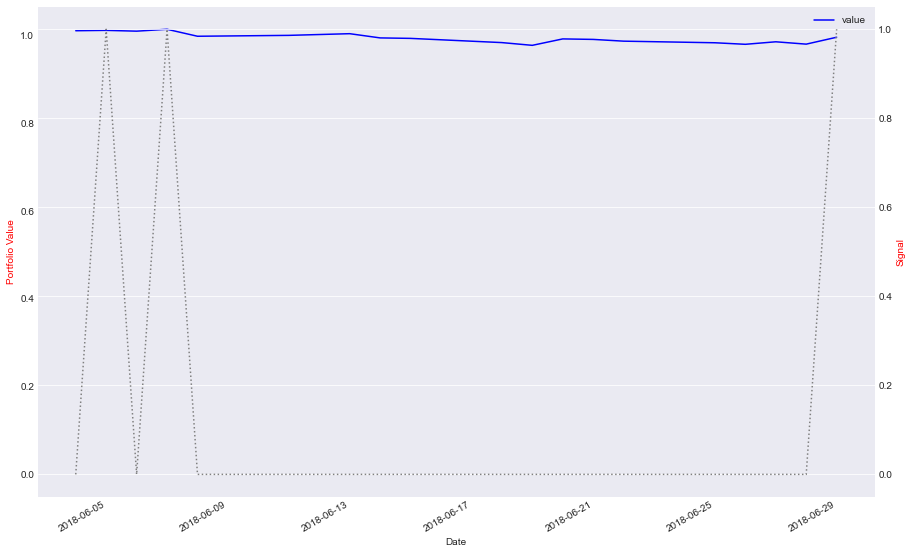

In [129]:
def get_strategy_returns_sma(portfolio):
    # Расчитываем скользящую среднюю за 10 дней    
    
    # Тут у нас 2 вида скользящих средних: SMA и EMA. При необходимости нужно раскоментить SMA.
    
    #portfolio['sma10'] = portfolio.value.rolling(window=10).mean() # Это именно SMA 
    
    portfolio['sma10'] = pd.Series.ewm(portfolio['value'], span=10).mean() # Это именно EMA просто не стал переименновывать переменную
    
    # Вычисляем торговые сигналы
    portfolio['signal'] = np.where(portfolio.value > portfolio.sma10,1,0)
    # Расчитываем доходность стратегии
    portfolio['str_returns'] = portfolio['returns'].shift(-1) * portfolio['signal']
    return portfolio

def plot_signal(portfolio):
    portfolio['value'].plot(color='blue')    
    plt.fill_between(portfolio.index, portfolio.value, where=(portfolio.signal==1), facecolor='g', alpha=0.2)      
    plt.legend()
    plt.ylabel('Portfolio Value',color='r')
    # Plot the signal values    
    portfolio['signal'].plot(secondary_y=True,figsize=(15,10),color='grey', linestyle='dotted')
    plt.ylabel('Signal',color='r')
    plt.show()

portfolio = get_strategy_returns_sma(portfolio)    
plot_signal(portfolio)   

The Sharpe ratio is -4.29 


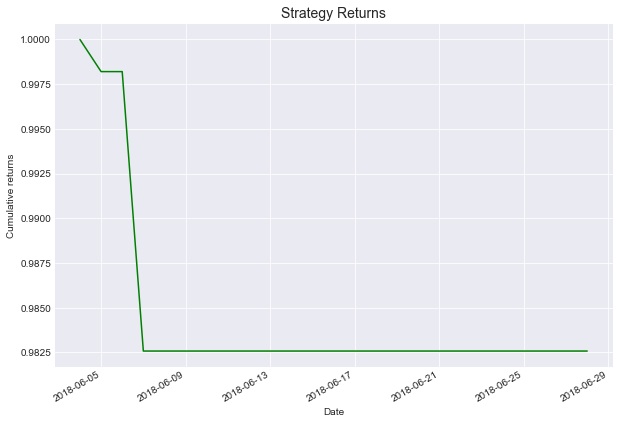

The maximum drawdown is -1.74


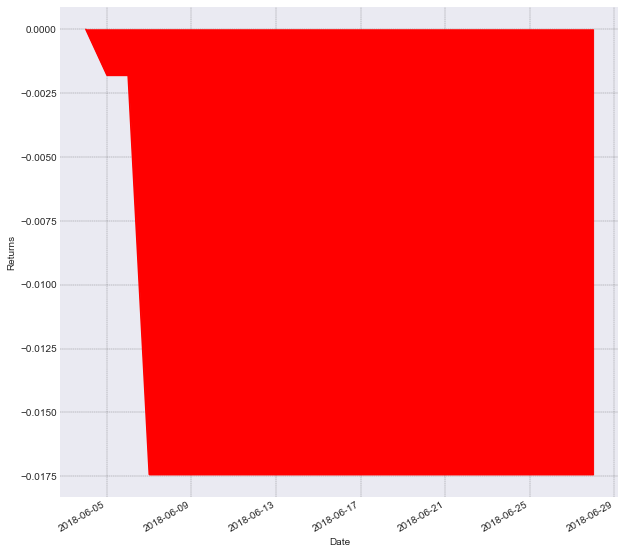

In [130]:
# Функция расчитывает показатели коэф. Шарпа, Кумулятивной доходности, Максимального падения.
def plot_returns_dd(portfolio):
    # ----------- Sharpe ratio ------------------
    sharpe_ratio = np.mean(portfolio.str_returns)/np.std(portfolio.str_returns)*(252**0.5)
    print('The Sharpe ratio is %.2f ' % sharpe_ratio)

    # ----------- Cumulative strategy returns ------------------
    portfolio['cum_str_returns'] = (portfolio['str_returns']+1).cumprod()
    # Plot the cumulative strategy returns
    portfolio['cum_str_returns'].plot(figsize=(10,7), color='green')
    plt.title('Strategy Returns', fontsize=14)
    plt.ylabel('Cumulative returns')
    plt.show()        

    # ----------- Drawdown ------------------    
    # Calculate the running maximum
    running_max = np.maximum.accumulate(portfolio['cum_str_returns'].dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = (portfolio['cum_str_returns'])/running_max - 1
    max_dd = drawdown.min()*100
    print('The maximum drawdown is %.2f' % max_dd)
    # Plot the drawdowns
    drawdown.plot(color='r',figsize=(10,10))
    plt.ylabel('Returns')
    plt.fill_between(drawdown.index, drawdown, color='red')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.2)
    plt.show()    
    
plot_returns_dd(portfolio) 

In [131]:
portfolio

,returns,value,sma10,signal,str_returns,cum_str_returns
Date,,,,,,
2018-06-04,0.010418,1.010418,1.010418,0,0.000000,1.000000
2018-06-05,0.000833,1.011260,1.010881,1,-0.001796,0.998204
2018-06-06,-0.001796,1.009444,1.010303,0,0.000000,0.998204
2018-06-07,0.004232,1.013716,1.011428,1,-0.015655,0.982577
2018-06-08,-0.015655,0.997847,1.007529,0,0.000000,0.982577
2018-06-11,0.002018,0.999860,1.005537,0,0.000000,0.982577
2018-06-13,0.003830,1.003689,1.005092,0,-0.000000,0.982577
2018-06-14,-0.009570,0.994084,1.002587,0,-0.000000,0.982577
2018-06-15,-0.001094,0.992996,1.000501,0,-0.000000,0.982577


In [132]:
# Выводим доходность по стратегии скользящих средних
cumulative_return = portfolio['cum_str_returns'][-2] - 1
print("Доходность по стратегии Скользящей средней")
print("cumulative_return =", "%.2f%%" % (100 * cumulative_return))

Доходность по стратегии Скользящей средней
cumulative_return = -1.74%


In [301]:
tickers = ['GMKN.ME', 'PLZL.ME', 'ROSN.ME', 'TCSG.ME', 'TATN.ME', 'NVTK.ME', 'POLY.ME', 'YNDX.ME', 'AFLT.ME', 'LKOH.ME', 'AFKS.ME', 'RUAL.ME', 'GAZP.ME', 'MAGN.ME', 'FIVE.ME', 'RSTI.ME', 'ALRS.ME', 'VTBR.ME', 'SBER.ME']
budget = 307000
price = yf.download(tickers, start="2021-06-05", end="2021-06-05")['Close'].transpose()
header_row = ['Ticker','Price']
top_decile = pd.DataFrame(price).reset_index()
top_decile.columns = header_row 
top_decile = top_decile.sort_values(by='Price', ascending=[False]).reset_index()
top_decile

[*********************100%***********************]  19 of 19 completed


,index,Ticker,Price
0,5,GMKN.ME,26392.000000
1,9,PLZL.ME,15635.500000
2,6,LKOH.ME,6505.000000
3,16,TCSG.ME,5300.600098
4,18,YNDX.ME,4932.000000
5,3,FIVE.ME,2252.000000
6,10,POLY.ME,1756.500000
7,8,NVTK.ME,1574.599976
8,11,ROSN.ME,556.750000
9,15,TATN.ME,512.799988


In [309]:
top_decile['Percent'] = 0
top_decile['Percent'].loc[0] = top_decile['Price'].loc[0]/budget
top_decile['Percent'].loc[1:] = (1-top_decile['Percent'].loc[0])/(len(top_decile['Price'])-1)

/Users/liliaromanova/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [310]:
top_decile['Quantity'] = 0
top_decile['Quantity'].loc[0] = 1
top_decile['Quantity'].loc[1:] = round((budget*top_decile['Percent'].loc[1:])/top_decile['Price'].loc[1:])

In [311]:
top_decile

,index,Ticker,Price,Percent,Quantity
0,5,GMKN.ME,26392.000000,0.085967,1.0
1,9,PLZL.ME,15635.500000,0.050780,1.0
2,6,LKOH.ME,6505.000000,0.050780,2.0
3,16,TCSG.ME,5300.600098,0.050780,3.0
4,18,YNDX.ME,4932.000000,0.050780,3.0
5,3,FIVE.ME,2252.000000,0.050780,7.0
6,10,POLY.ME,1756.500000,0.050780,9.0
7,8,NVTK.ME,1574.599976,0.050780,10.0
8,11,ROSN.ME,556.750000,0.050780,28.0
9,15,TATN.ME,512.799988,0.050780,30.0


In [312]:
a = top_decile['Price']*top_decile['Quantity']
a.sum()

304246.13636971265

In [313]:
top_decile['Percent'].sum()

1.0